# Chapter 11 - Unsupervised Learning - PCA and Clustering

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# PCA

Let's perform PCA from scratch in Python:
1. Compute the correlation or covariance matrix of a given dataset.
2. Find the eigenvalues and eigenvectors of the correlation or covariance matrix.
3. Multiply the eigenvector matrix by the original dataset and you will get the
principal component matrix.

In [5]:
# Import linear algebra module
from scipy import linalg as la

# Create dataset
data = np.array([[7., 4., 3.],
                [4., 1., 8.],
                [6., 3., 5.],
                [8., 6., 1.],
                [8., 5., 7.],
                [7., 2., 9.],
                [5., 3., 3.],
                [9., 5., 8.],
                [7., 4., 5.],
                [8., 2., 2.]])

print("Dataset:\n", data)

# 1. Calculate the covariance matrix =======================================

# Center your data
data -= data.mean(axis=0)         # Subtracting the mean of each feature (column) from the data, data centered in zero.
cov = np.cov(data, rowvar=False)  # Setting 'rowvar=False' makes each column as a variable (feature) and each row as an observation (sample).

print("\nCovariance Matrix:\n", cov)
print()

Dataset:
 [[7. 4. 3.]
 [4. 1. 8.]
 [6. 3. 5.]
 [8. 6. 1.]
 [8. 5. 7.]
 [7. 2. 9.]
 [5. 3. 3.]
 [9. 5. 8.]
 [7. 4. 5.]
 [8. 2. 2.]]

Covariance Matrix:
 [[ 2.32222222  1.61111111 -0.43333333]
 [ 1.61111111  2.5        -1.27777778]
 [-0.43333333 -1.27777778  7.87777778]]



The original dataset data has a shape of (10, 3). *The covariance matrix is calculated based on the relationships between features (not samples).* So, Covariance Matrix has a shape of (3,3).

In [7]:
# 2. Find the eigenvalues and eigenvectors of the covariance Matrix ========

# Calculate eigenvalues and eigenvector of the covariance matrix
evals, evecs = la.eig(cov)

print("Eigenvalues:\n", evals)
print("\nEigenvector:\n", evecs)

Eigenvalues:
 [0.74992815+0.j 3.67612927+0.j 8.27394258+0.j]

Eigenvector:
 [[-0.70172743  0.69903712 -0.1375708 ]
 [ 0.70745703  0.66088917 -0.25045969]
 [ 0.08416157  0.27307986  0.95830278]]


This is all the eigenvalues and eigenvector from Covariance Matrix. But we are interested only in the 2 most relevants to describe the original dataset.
In this case, the major value is 8.27 and the second major value is 3.68.

In [9]:
# 3. Multiply the eigenvector matrix by the original dataset ===============

# Sort the Eigen values and vector and select components
num_components = 2                                      # We choose to retain 2 principal components.       
sorted_key = np.argsort(evals)[::-1][:num_components]   # Sort eigenvalues in descending order and select the top 'num_components' indices.
evals = evals[sorted_key]                               # Select the top 'num_components' eigenvalues, ordered from largest to smallest.
evecs = evecs[:, sorted_key]                            # Reorder the columns of eigenvectors to match the order of the sorted eigenvalues.

print("Sorted and Selected Eigen Values:\n", evals)
print("\nSorted and Selected Eigen Vector:\n", evecs)

# Multiply original data and Eigen vector
principal_components = np.dot(data,evecs)
print("\nPrincipal Components:\n", principal_components)

Sorted and Selected Eigen Values:
 [8.27394258+0.j 3.67612927+0.j]

Sorted and Selected Eigen Vector:
 [[-0.1375708   0.69903712]
 [-0.25045969  0.66088917]
 [ 0.95830278  0.27307986]]

Principal Components:
 [[-2.15142276 -0.17311941]
 [ 3.80418259 -2.88749898]
 [ 0.15321328 -0.98688598]
 [-4.7065185   1.30153634]
 [ 1.29375788  2.27912632]
 [ 4.0993133   0.1435814 ]
 [-1.62582148 -2.23208282]
 [ 2.11448986  3.2512433 ]
 [-0.2348172   0.37304031]
 [-2.74637697 -1.06894049]]


#### PCA using scikit-learn

In [11]:
from sklearn.decomposition import PCA

# Create dataset
data = np.array([[7., 4., 3.],
                [4., 1., 8.],
                [6., 3., 5.],
                [8., 6., 1.],
                [8., 5., 7.],
                [7., 2., 9.],
                [5., 3., 3.],
                [9., 5., 8.],
                [7., 4., 5.],
                [8., 2., 2.]])

# Create and fit_transformed PCA Model
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)

components_df = pd.DataFrame(data = components, columns = ['principal_component_1', 'principal_component_2'])
print(components_df)

   principal_component_1  principal_component_2
0              -2.151423              -0.173119
1               3.804183              -2.887499
2               0.153213              -0.986886
3              -4.706518               1.301536
4               1.293758               2.279126
5               4.099313               0.143581
6              -1.625821              -2.232083
7               2.114490               3.251243
8              -0.234817               0.373040
9              -2.746377              -1.068940


# Clustering

### Choosing K with Elbow Method

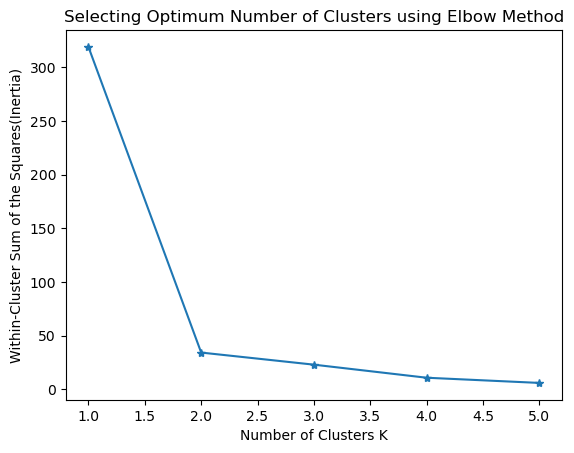

In [14]:
from sklearn.cluster import KMeans

# Create a DataFrame
data=pd.DataFrame({"X":[12,15,18,10,8,9,12,20], 
                   "Y":[6,16,17,8,7,6,9,18]})
wcss_list = []

# Run a loop for different value of number of cluster
for i in range(1, 6):
    
    # Create and fit the KMeans model
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(data)

    # Add the WCSS or inertia of the clusters to the score_list
    wcss_list.append(kmeans_model.inertia_)

# Plot the inertia(WCSS) and number of clusters
plt.plot(range(1, 6), wcss_list, marker='*')
plt.title('Selecting Optimum Number of Clusters using Elbow Method') # set title of the plot
plt.xlabel('Number of Clusters K')                                   # Set x-axis label
plt.ylabel('Within-Cluster Sum of the Squares(Inertia)')             # Set y-axis label
plt.show()                                                           # Display plot

In the preceding example, we created a DataFrame with two columns, X and Y. We
generated the clusters using K-means and computed the WCSS. After this, we plotted the
number of clusters and inertia. As you can see at k = 2, the graph begins to flatten
significantly, so we would choose 2 as the best number of clusters.

### Choosing K with Silhouette Method

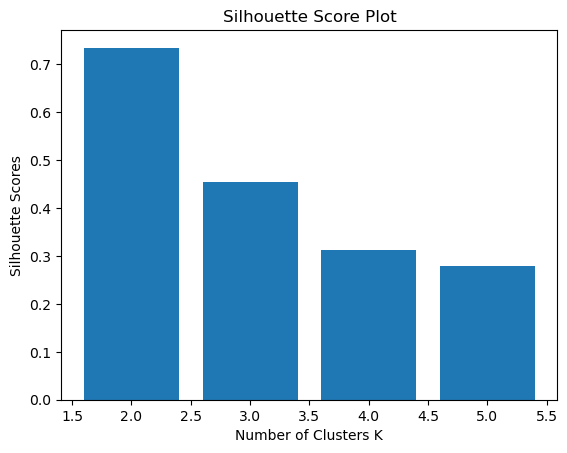

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a DataFrame
data=pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
                   "Y":[6,16,17,8,7,6,9,18]})
score_list = []

# Run a loop for different value of number of cluster
for i in range(2, 6):
    
    # Create and fit the KMeans model
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(data)

    # Make predictions
    pred = kmeans_model.predict(data)

    # Calculate the Silhouette Score
    score = silhouette_score (data, pred, metric='euclidean')

    # Add the Silhouette score of the clusters to the score_list
    score_list.append(score)

# Plot the Silhouette score and number of cluster
plt.bar(range(2, 6), score_list)
plt.title('Silhouette Score Plot') # Set title of the plot
plt.xlabel('Number of Clusters K') # Set x-axis label
plt.ylabel('Silhouette Scores')    # Set y-axis label
plt.show()                         # Display plot

We generated clusters with different numbers of clusters on the created DataFrame using Kmeans and computed the silhouette score. After this, we plotted the number of clusters and the silhouette scores using a barplot. As you can see, at k = 2, the silhouette score has the highest value, so we would choose 2 clusters.

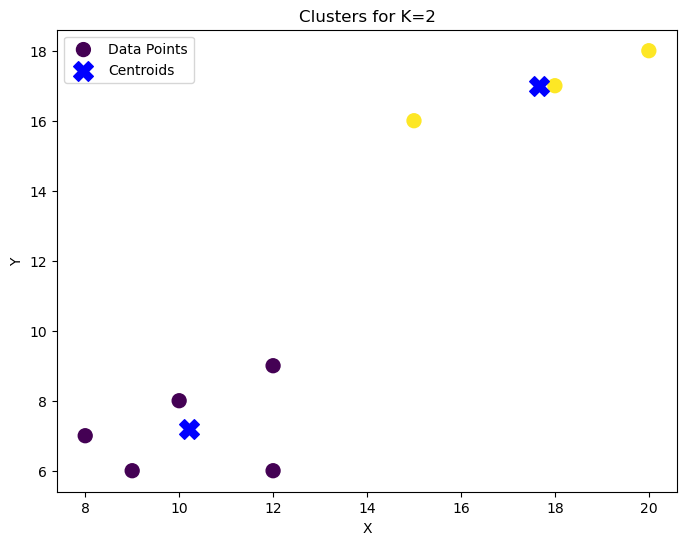

In [19]:
# Create a DataFrame
data = pd.DataFrame({"X": [12, 15, 18, 10, 8, 9, 12, 20], 
                     "Y": [6, 16, 17, 8, 7, 6, 9, 18]})

# Create and fit the KMeans model for K=2
kmeans_model = KMeans(n_clusters=2, random_state=123)
kmeans_model.fit(data)

# Get the cluster labels for each data point
labels = kmeans_model.labels_

# Get the cluster centroids
centroids = kmeans_model.cluster_centers_

# Plot the data points and color them by their cluster
plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], c=labels, cmap='viridis', marker='o', s=100, label='Data Points')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', marker='X', s=200, label='Centroids')

# Set plot title and labels
plt.title('Clusters for K=2')
plt.xlabel('X')
plt.ylabel('Y')

# Add a legend
plt.legend()

# Display plot
plt.show()

# Hierarchical Clustering

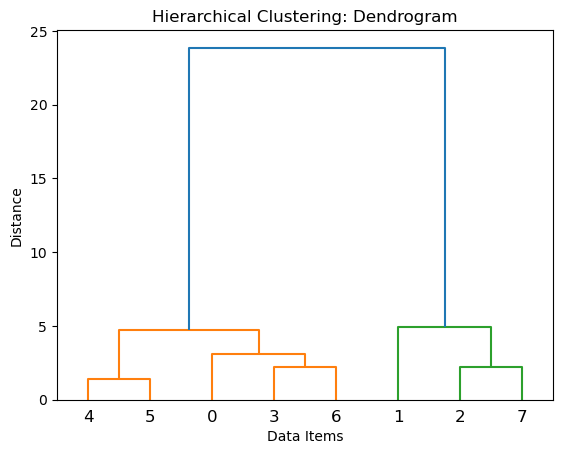

In [21]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Create a DataFrame
data = pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
                     "Y":[6,16,17,8,7,6,9,18]})

# create dendrogram using ward linkage
dendrogram_plot = dendrogram(linkage(data, method = 'ward'))
plt.title('Hierarchical Clustering: Dendrogram')  # Set title of the plot
plt.xlabel('Data Items')                          # Set x-axis label
plt.ylabel('Distance')                            # Set y-axis label
plt.show()                                        # Display the plot

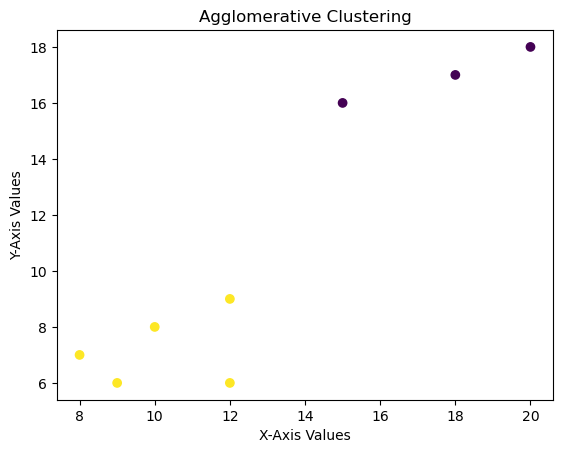

In [22]:
from sklearn.cluster import AgglomerativeClustering

# Create a DataFrame
data = pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
                     "Y":[6,16,17,8,7,6,9,18]})

# Specify number of clusters
num_clusters = 2

# Create agglomerative clustering model
ac = AgglomerativeClustering(n_clusters = num_clusters, linkage='ward')

# Fit the Agglomerative Clustering model
ac.fit(data)

# Predict the target variable
pred=ac.labels_

# Plot the Clusters
plt.scatter(data.X,data.Y,c=pred, marker="o")

plt.title('Agglomerative Clustering') # Set title of the plot
plt.xlabel('X-Axis Values')           # Set x-axis label
plt.ylabel('Y-Axis Values')           # Set y-axis label
plt.show()                            # Display the plot

# DBSCAN clustering

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is based on the
idea of groups and noise. The main idea behind it is that each data item of a group or
cluster has a minimum number of data items in a given radius.

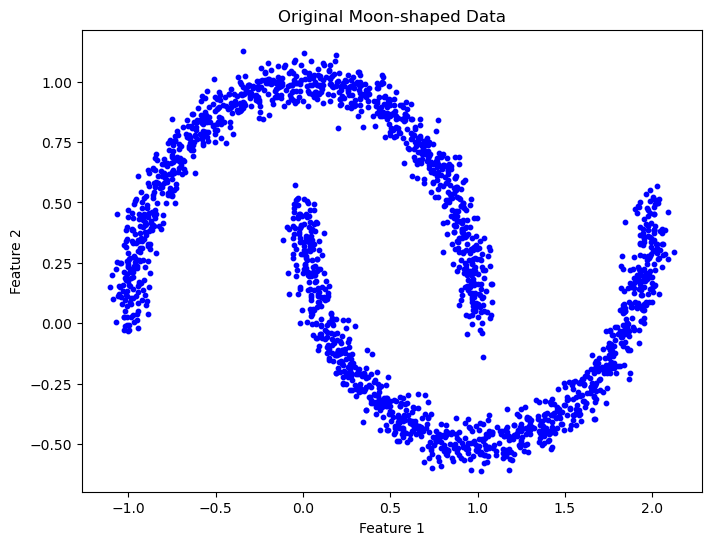

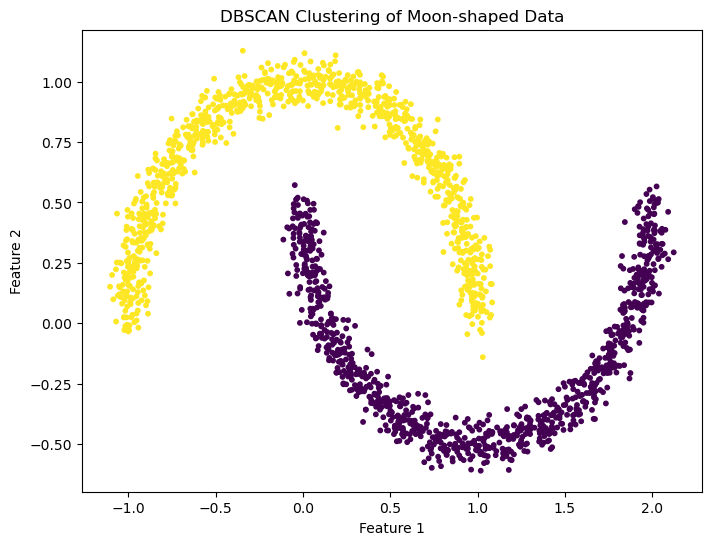

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generate random moon-shaped data
features, label = make_moons(n_samples=2000, noise=0.05, random_state=42)

# Plotting the original moon-shaped data
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], s=10, marker='o', color='blue')
plt.title('Original Moon-shaped Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Apply DBSCAN clustering
dbscan_model = DBSCAN(eps=0.15, min_samples=5)  # Adjust 'eps' and 'min_samples' for better results
clusters = dbscan_model.fit_predict(features)

# Plotting the data with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=clusters, cmap='viridis', s=10, marker='o')
plt.title('DBSCAN Clustering of Moon-shaped Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

`eps=0.15`: The eps value controls the maximum distance between two points for them to be considered in the same neighborhood. A higher value helps DBSCAN detect larger clusters. Adjusting eps to 0.15 helps form exactly 2 clusters in the moon shape.

`min_samples=5`: The minimum number of points required to form a dense region or a cluster. Keeping this at 5 generally works well for the moon-shaped data.

Below, a simple version of the same graph:

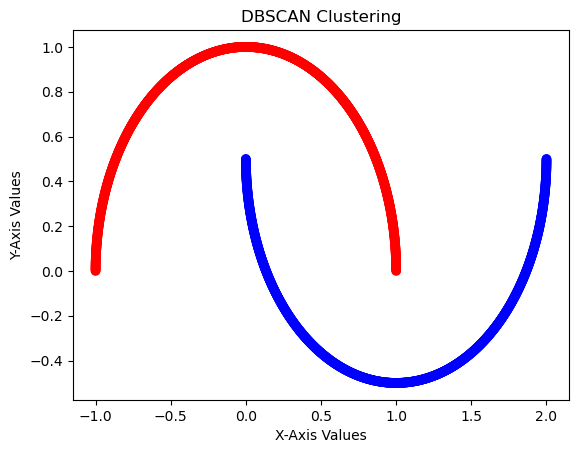

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generate some random moon data
features, label = make_moons(n_samples = 2000)

# Create DBSCAN clustering model
db = DBSCAN()

# Fit the Spectral Clustering model
db.fit(features)

# Predict the target variable
pred_label = db.labels_

# Plot the Clusters
plt.scatter(features[:, 0], features[:, 1], c=pred_label,
marker="o",cmap="bwr_r")
plt.title('DBSCAN Clustering') # Set title of the plot
plt.xlabel('X-Axis Values')    # Set x-axis label
plt.ylabel('Y-Axis Values')    # Set y-axis label
plt.show()                     # Display the plot

# Evaluating Clustering Performance

In [29]:
# Use the raw link to access the actual CSV file
url = "https://raw.githubusercontent.com/PacktPublishing/Python-Data-Analysis-Third-Edition/refs/heads/master/Chapter09/diabetes.csv"

# Reading the CSV file
diabetes = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# split dataset in two parts: feature set and target label
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set]
target = diabetes.label

# partition data into training and testing set
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, 
                                                                          target, 
                                                                          test_size=0.3, 
                                                                          random_state=1)

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import fowlkes_mallows_score

# Specify the number of clusters
num_clusters = 2

# Create and fit the KMeans model
km = KMeans(n_clusters=num_clusters)
km.fit(feature_train)

# Predict the target variable
predictions = km.predict(feature_test)

# Calculate internal performance evaluation measures
print("  Davies-Bouldin Index:", round(davies_bouldin_score(feature_test, predictions), 4))
print("Silhouette Coefficient:", round(silhouette_score(feature_test, predictions), 4))
print()

# Calculate external performance evaluation measures
print("   Adjusted Rand Score:", round(adjusted_rand_score(target_test, predictions), 4))
print("         Jaccard Score:", round(jaccard_score(target_test, predictions), 4))
print("  F-Measure (F1-Score):", round(f1_score(target_test, predictions), 4))
print(" Fowlkes Mallows Score:", round(fowlkes_mallows_score(target_test, predictions), 4))

  Davies-Bouldin Index: 0.7917
Silhouette Coefficient: 0.5365

   Adjusted Rand Score: 0.0379
         Jaccard Score: 0.2232
  F-Measure (F1-Score): 0.365
 Fowlkes Mallows Score: 0.6041
